In [1]:

import pandas as pd
import numpy as np
import metapack as mp
from pathlib import Path
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from sdipylib.plot import  source_attribution

# /Users/eric/opt/anaconda3/envs/data/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
# The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
#   layout[ax.rowNum, ax.colNum] = ax.get_visible()
import warnings
warnings.simplefilter("ignore")

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

%run weights.py
%run lib.py 

source = "Survey of Consumer Finances, 2016 and 2019 pooled"

In [2]:
pkg = multi_open('federalreserve.gov-consumer_finances-2016e2019-inherit', print_ref=True)
#pkg = mp.jupyter.open_source_package()
pkg

Opening:  index:federalreserve.gov-consumer_finances-2016e2019-inherit


# Survey of Consumer Finances, Inheritance Extract
`federalreserve.gov-consumer_finances-2016e2019-inherit-1.2.6` Last Update: 2020-12-23T22:27:54

_An Extract from the survey of consumer finances for studying networth and ineritance, from multiple years_


This is an extract of the 2016 and 2019 Survey of Consumer Finances, with extracted variables
and recoded variables oriented toward studying inheritance.


 
## Images

[![doc_img](docs/networth_race_inc.png "networth_race_inc")](docs/networth_race_inc.png)

Net Worth by Income Percentile and Race## Notes

* Version 1.2.2 Added the Inflatable flag
* Version 1.2.3 Inflated dollar ammounts to current dollars
* Version 1.2.6 Fixed inflation error, dded non-inflated dataset.
## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [inherit_scf_16_19](data/inherit_scf_16_19.csv)**. Extract of the 2016 and 2019 SCF for inheritance and networth,uninflated
* ** [inherit_scf_16_19_i](data/inherit_scf_16_19_i.csv)**. Extract of the 2016 and 2019 SCF for inheritance and networth, inflated to 2020 dollars

## References
<ul><li> <strong>scf</string>, <em>metapack+http://library.metatab.org/federalreserve.gov-consumer_finances.csv</em>. Survey of consumer finances data packages</li><li> <strong><a href="https://fred.stlouisfed.org/graph/fredgraph.csv?&id=CPIAUCSL">cpi</a></strong>. Consumer Price Index</li><ul>

In [6]:
inherit_scf_16_19 = pkg.resource('inherit_scf_16_19_i').dataframe()

df =   make_descriptive_df(inherit_scf_16_19)    
dfs = df.sample(500_000, replace=True, weights=df.wt0)

In [5]:
pkg.resource('inherit_scf_16_19_i')

Header,Type,Description
year,integer,Year of the SCL reelase the record was drawn from
case_id,integer,
record_id,integer,
implicate_id,integer,"Impicate number, 1 to 5"
age_1,integer,Age of first household adult
age_2,integer,Age of second household adult.
hisp,integer,Is the HH Hispanic
race,string,Simpified race for HH
addtional_race,integer,
unusual_income,integer,


In [18]:
(dfs.gi_pv_5/dfs.networth).clip(0,10).mean()

0.2609673474416501

In [40]:
t = dfs[dfs.year == 2016].copy()
(t.gi_pv_5/t.networth).clip(None, 1).mean()

0.007479052970515488

In [85]:
# Roughtly equal count bins, on ratio of inheritance to total net worth
bins = [-np.inf,  0, 2.62840016e-02,  8.15457002e-02,  1.50200150e-01,
        2.48793776e-01,  3.77233895e-01,  5.86701327e-01,  8.96220638e-01,
        1.38364909e+00,  2.87914355e+00,  np.inf]
t = dfs[dfs.year == 2016].copy()
#t.loc[t.gi_pv_5 == 0,'gi_pv_5'] = np.random.rand(len(t[t.gi_pv_5 == 0]))
pd.cut((t.gi_pv_5/t.networth), bins).value_counts()

(-inf, 0.0]         194590
(0.896, 1.384]        5498
(0.0815, 0.15]        5498
(1.384, 2.879]        5497
(0.377, 0.587]        5494
(0.15, 0.249]         5494
(2.879, inf]          5487
(0.0263, 0.0815]      5486
(0.249, 0.377]        5485
(0.587, 0.896]        5477
(0.0, 0.0263]         3230
dtype: int64

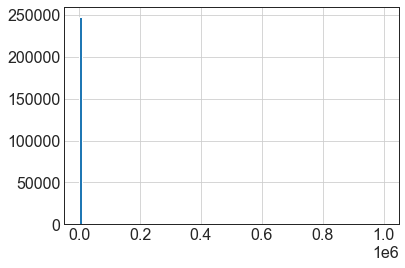

In [106]:
t = dfs[dfs.year == 2016].copy()
t.loc[t.gi_pv_5 == 0,'gi_pv_5'] = np.random.rand(len(t[t.gi_pv_5 == 0]))
t['gi_nw_r'] = (t.gi_pv_5/t.networth).clip(-1e6, 1e6)

#t = t[ (t.gi_nw_r >= 0 ) & (t.gi_nw_r < 3) ]
t.gi_nw_r.hist(bins=100)

In [111]:
t.gi_nw_r.mean()

2126.5431425669226

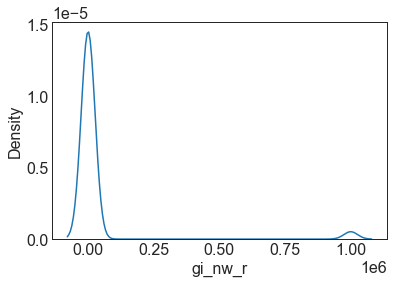

In [110]:
sns.kdeplot(t[t.gi_nw_r>1].gi_nw_r)